<a href="https://colab.research.google.com/github/mhlaghari/portfolio/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis
**Overview:** By using the newsapi, I was able to extract news article, run a sentiment analysis using IBM Watson API, and analyze the data using pandas and numpy.

*Skills demonstrated*


*   Creating functions
*   Using API
*   Extracting news information
*   Analyzing data
*   Creating charts



This project was my final assignment for Dealing with Data, Masters of Science in Business Analytics (MSBA) class of 22 at New York University, Stern School of Business.

https://www.linkedin.com/in/mhlaghari



**Part 1: Use a Web API to get URLs for news articles**

Go to https://newsapi.org and create an account and get a key

Write a function getNews(source) that accepts the name of a source, queries the NewsAPI, and returns back a list of URLs with the news stories that appear in that source. For example, the outcome of the command

getNews('the-wall-street-journal')

can be the following list:

['https://www.wsj.com/articles/trump-faces-tensions-at-g-7-summit-1495803166',
'https://www.wsj.com/articles/gunmen-in-egypt-attack-bus-carrying-coptic-christians-1495796748',
'https://www.wsj.com/articles/u-k-rolls-up-alleged-accomplices-of-suicide-bomber-1495821597',
'https://www.wsj.com/articles/u-s-gdp-growth-revised-up-to-1-2-rate-in-first-quarter-1495802143', ....]


Follow the documentation at https://newsapi.org/#documentation and figure out how to get the list of articles from various news sources.

You can get some help by looking at the NewsAPI.ipynb notebook stored under 04-WebAPIs on Github.



In [ ]:
import requests

newsapi_key = 'b9ad6b2d41ff4a0ba0352bfd2ebbd8b3'

endpoint = 'https://newsapi.org/v2/top-headlines'
parameters = {
    'country' : 'us',
    'category' : 'business',
    'apiKey' : newsapi_key,
    'pageSize' : 100
}
resp = requests.get(endpoint, params=parameters)

data = resp.json()
data.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [ ]:
data

{'articles': [{'author': 'Matthew J. Belvedere',
   'content': 'Here are the most important news, trends and analysis that investors need to start their trading day:\r\n1. Stocks look steady ahead of the post-Fed meeting updates\r\nTraders on the floor of the New Yor… [+3795 chars]',
   'description': "U.S. stock futures were flat ahead of Wednesday afternoon's conclusion of the Federal Reserve's two-day June meeting.",
   'publishedAt': '2021-06-16T11:59:51Z',
   'source': {'id': None, 'name': 'CNBC'},
   'title': '5 things to know before the stock market opens Wednesday - CNBC',
   'url': 'https://www.cnbc.com/2021/06/16/5-things-to-know-before-the-stock-market-opens-wednesday-june-16.html',
   'urlToImage': 'https://image.cnbcfm.com/api/v1/image/106896785-16236945000372-Trading-Floor-OB-Photo-210614-PRESS-7-jpg?v=1623694602'},
  {'author': 'Peter Schacknow',
   'content': 'Take a look at some of the biggest movers in the premarket:\r\nOracle (ORCL) Oracle earned $1.54 per share for 

In [ ]:
for article in data['articles']:
  print (article['url'])

https://www.cnbc.com/2021/06/16/5-things-to-know-before-the-stock-market-opens-wednesday-june-16.html
https://www.cnbc.com/2021/06/16/stocks-making-the-biggest-moves-in-the-premarket-oracle-roblox-kindred-biosciences-more.html
https://www.wsj.com/articles/china-to-release-metal-reserves-in-effort-to-tame-commodities-rally-11623825424
https://www.cnbc.com/2021/06/16/fords-luxury-lincoln-brand-aims-for-half-of-sales-to-be-electric-vehicles-by-2026.html
https://www.huffpost.com/entry/fda-aduhelm-alzheimer-drug-price-should-worry_n_60c84f9ee4b02df18f7fed84
https://www.cnbc.com/2021/06/16/regeneron-antibody-cocktail-can-save-lives-in-hospitalized-covid-patients.html
https://www.foxbusiness.com/markets/bitcoin-wed
https://www.cnn.com/travel/article/royal-caribbean-cruise-postponed-covid/index.html
https://www.cnbc.com/2021/06/16/chinas-retail-sales-miss-expectations-again.html
https://www.foxbusiness.com/markets/stock-futures-trade-cautiously-ahead-of-fed-policy-decision
https://www.cnbc.com

In [ ]:
def getNews(source):
     
  url_list = []

  for article in data['articles']:
    if source == article['source']['id']:
      url_list.append(article['url'])

  return url_list

#getNews('al-jazeera-english')
getNews('the-wall-street-journal')
#getNews('business-insider')


['https://www.wsj.com/articles/china-to-release-metal-reserves-in-effort-to-tame-commodities-rally-11623825424',
 'https://www.wsj.com/articles/a-global-first-bitcoin-as-national-currency-11623796143',
 'https://www.wsj.com/articles/platinum-equity-strikes-deal-to-buy-mcgraw-hill-from-apollo-11623788101']

**Part 2: Analyze a news article using IBM Watson Natural Language Understanding API**

Use the IBM Watson Natural Language Understanding API, and write a function extractEntities(url, source) that takes as input a URL, and returns a list of dictionaries, with every dictionary containing the entity name, the URL where the entity appeared, the relevance of the entity to the article, and the sentiment about the entity. For example, after calling the function
url = 'http://www.politico.com/story/2017/05/23/infrastructure-transportation-trump-budget-238741'
extractEntities(url, 'politico')

we may get back a list of dictionaries, with each dictionary representing an entity, and looking like this: 

{
'entity': 'Donald Trump',
'url': 'http://www.politico.com/story/2017/05/23/infrastructure-transportation-trump-budget-238741',
'source': 'politico',
'relevance': 0.882851,
'sentiment': -0.25
}

The function extractEntities should return a list of dictionaries, with each dictionary in the list corresponding to one entity.

In [ ]:
import requests 
import json

API_KEY = '3dl7XXkv1TRSkvzBLAl4zGrtlW8ImCyuTKe5R5GfHPUx'

URL = 'https://api.eu-gb.natural-language-understanding.watson.cloud.ibm.com/instances/b42e9387-da4a-4292-865a-cda8a95f1f2f'

In [ ]:
def processURL(url_to_analyze):
    endpoint_watson = f"{URL}/v1/analyze"
    params = {
        'version': '2020-08-01',
    }
    headers = { 
        'Content-Type': 'application/json',
    }
    watson_options = {
      "url": url_to_analyze,
      "features": {
        "entities": {
          "sentiment": True,
          "emotion": True,
          "limit": 10
        }
      }
    }
    username = "apikey"
    password = API_KEY

    resp = requests.post(endpoint_watson, 
                         data=json.dumps(watson_options), 
                         headers=headers, 
                         params=params, 
                         auth=(username, password) 
                        )
    return resp.json()

In [ ]:
def extractEntities(url, source):
  # Query IBM's API for entities results
  data = processURL(url)
  # Loop through each result in the entities list and extract out sentiment, relevance and text
  
  entity_list = []
  for entity in data['entities']:
    entity_list.append({
        "name": entity['text'],
        "relevance": entity['relevance'],
        "sentiment": entity['sentiment']['score'],
        "url": url,
        "source": source
    })

  return entity_list

In [ ]:
url = 'https://www.theverge.com/2021/6/15/22535453/amazon-covid-test-consumers-available'
source = 'The Verge'

extractEntities(url, source)

[{'name': 'Amazon',
  'relevance': 0.969317,
  'sentiment': 0.420042,
  'source': 'The Verge',
  'url': 'https://www.theverge.com/2021/6/15/22535453/amazon-covid-test-consumers-available'},
 {'name': 'Stat News',
  'relevance': 0.644211,
  'sentiment': 0,
  'source': 'The Verge',
  'url': 'https://www.theverge.com/2021/6/15/22535453/amazon-covid-test-consumers-available'},
 {'name': '$39.99',
  'relevance': 0.63013,
  'sentiment': 0,
  'source': 'The Verge',
  'url': 'https://www.theverge.com/2021/6/15/22535453/amazon-covid-test-consumers-available'},
 {'name': 'Food and Drug Administration',
  'relevance': 0.262677,
  'sentiment': 0.239476,
  'source': 'The Verge',
  'url': 'https://www.theverge.com/2021/6/15/22535453/amazon-covid-test-consumers-available'},
 {'name': 'DxTerity',
  'relevance': 0.247719,
  'sentiment': 0,
  'source': 'The Verge',
  'url': 'https://www.theverge.com/2021/6/15/22535453/amazon-covid-test-consumers-available'},
 {'name': '$99',
  'relevance': 0.207788,
  '

**Part 3: Extract the entities that appear in the news**

Using the getNews(source) function, get the URLs of the news stories that appear in the source Wall Street Journal. (You can figure out the name of the source for the API, using the API call https://newsapi.org/v2/sources.)
Using the getNews(source) function, get the URLs of the news stories that appear in the source The Washington Post.
Note: You can figure out the name of the sources for the API, using the API call  "Sources" https://newsapi.org/v2/sources
Use the extractEntities(url, source) function to extract the entities that appear in The Wall Street Journal.
Use the extractEntities(url, source) function to extract the entities that appear in The Washington Post.
Load the extracted entities into a Pandas Dataframe. Remember that if you have a list of dictionaries, you can directly load the list into a dataframe. For example, check how the code below works:

import pandas as pd

entities = [
{'entity': 'Donald Trump',
'relevance': 0.338152,
'sentiment': 0.0116408,
'source': 'reuters',
'url': 'http://www.reuters.com/article/us-religion-ramadan-usa-tillerson-exclsu-idUSKBN18M2IE'},
{'entity': 'United States',
'relevance': 0.337925,
'sentiment': -0.373016,
'source': 'reuters',
'url': 'http://www.reuters.com/article/us-religion-ramadan-usa-tillerson-exclsu-idUSKBN18M2IE'},
{'entity': 'Donald Trump',
'relevance': 0.89934,
'sentiment': 0.244183,
'source': 'associated-press',
'url': 'https://apnews.com/088c39d02cbc40a9871654c848c2c069'},
{'entity': 'United States',
'relevance': 0.303394,
'sentiment': 0.0691811,
'source': 'associated-press',
'url': 'https://apnews.com/088c39d02cbc40a9871654c848c2c069'},
]

df = pd.DataFrame(entities)
df



In [ ]:
import requests

newsapi_key = 'b9ad6b2d41ff4a0ba0352bfd2ebbd8b3'

endpoint = 'https://newsapi.org/v2/top-headlines'
parameters = {
    'country' : 'us',
    'category' : 'business',
    'apiKey' : newsapi_key,
    'pageSize' : 100
}
resp = requests.get(endpoint, params=parameters)

data = resp.json()
data.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [ ]:
for article in data['articles']:
    print(article['source'])

{'id': None, 'name': 'CNBC'}
{'id': None, 'name': 'CNBC'}
{'id': 'the-wall-street-journal', 'name': 'The Wall Street Journal'}
{'id': None, 'name': 'CNBC'}
{'id': None, 'name': 'HuffPost'}
{'id': None, 'name': 'CNBC'}
{'id': None, 'name': 'Fox Business'}
{'id': 'cnn', 'name': 'CNN'}
{'id': None, 'name': 'CNBC'}
{'id': None, 'name': 'Fox Business'}
{'id': None, 'name': 'CNBC'}
{'id': None, 'name': 'Cointelegraph'}
{'id': None, 'name': 'KSL.com'}
{'id': 'usa-today', 'name': 'USA Today'}
{'id': 'google-news', 'name': 'Google News'}
{'id': 'engadget', 'name': 'Engadget'}
{'id': None, 'name': 'KATU'}
{'id': 'google-news', 'name': 'Google News'}
{'id': None, 'name': 'Yahoo Entertainment'}
{'id': None, 'name': 'KTLA Los Angeles'}
{'id': None, 'name': 'Cointelegraph'}
{'id': 'techcrunch', 'name': 'TechCrunch'}
{'id': None, 'name': 'FDA.gov'}
{'id': 'the-wall-street-journal', 'name': 'The Wall Street Journal'}
{'id': 'reuters', 'name': 'Reuters'}
{'id': 'axios', 'name': 'Axios'}
{'id': 'bloombe

In [ ]:
def getNews(source):

  url_list = []

  for article in data['articles']:
    if source == article['source']['name']:
      url_list.append(article['url'])

  return url_list

getNews('google-news')

[]

In [ ]:
source = 'The Wall Street Journal'

getNews(source)

['https://www.wsj.com/articles/china-to-release-metal-reserves-in-effort-to-tame-commodities-rally-11623825424',
 'https://www.wsj.com/articles/a-global-first-bitcoin-as-national-currency-11623796143',
 'https://www.wsj.com/articles/platinum-equity-strikes-deal-to-buy-mcgraw-hill-from-apollo-11623788101']

In [ ]:
source = 'Bloomberg'

getNews(source)

['https://www.bloomberg.com/tosv2.html?vid=&uuid=d4ab6470-ce80-11eb-bab5-b15db65cb1d5&url=L25ld3MvYXJ0aWNsZXMvMjAyMS0wNi0xNS9hc2lhLXN0b2Nrcy10by1kaXAtYXMtZmVkLW1lZXRzLW9pbC1leHRlbmRzLXJhbGx5LW1hcmtldHMtd3JhcA==']

In [ ]:
source = 'The Wall Street Journal'
url  = getNews(source)

all_wsj_urls  = []

for each_url in url:
  all_wsj_urls += extractEntities(each_url, source)


print(all_wsj_urls)


[{'name': 'China', 'relevance': 0.965446, 'sentiment': -0.557499, 'url': 'https://www.wsj.com/articles/china-to-release-metal-reserves-in-effort-to-tame-commodities-rally-11623825424', 'source': 'The Wall Street Journal'}, {'name': '67%', 'relevance': 0.829326, 'sentiment': 0.397632, 'url': 'https://www.wsj.com/articles/china-to-release-metal-reserves-in-effort-to-tame-commodities-rally-11623825424', 'source': 'The Wall Street Journal'}, {'name': 'National Food and Strategic Reserves Administration', 'relevance': 0.597584, 'sentiment': 0.578833, 'url': 'https://www.wsj.com/articles/china-to-release-metal-reserves-in-effort-to-tame-commodities-rally-11623825424', 'source': 'The Wall Street Journal'}, {'name': 'Beijing', 'relevance': 0.47659, 'sentiment': -0.497916, 'url': 'https://www.wsj.com/articles/china-to-release-metal-reserves-in-effort-to-tame-commodities-rally-11623825424', 'source': 'The Wall Street Journal'}, {'name': '5%', 'relevance': 0.290518, 'sentiment': -0.879126, 'url':

In [ ]:
source = 'Bloomberg'
url  = getNews(source)

all_blm_urls  = []

for each_url in url:
  all_blm_urls += extractEntities(each_url, source)


print(all_blm_urls)

[]


In [ ]:
import pandas as pd

df = pd.DataFrame(all_blm_urls+ all_wsj_urls)

In [ ]:
df

,name,relevance,sentiment,url,source
0,China,0.965446,-0.557499,https://www.wsj.com/articles/china-to-release-...,The Wall Street Journal
1,67%,0.829326,0.397632,https://www.wsj.com/articles/china-to-release-...,The Wall Street Journal
2,National Food and Strategic Reserves Administr...,0.597584,0.578833,https://www.wsj.com/articles/china-to-release-...,The Wall Street Journal
3,Beijing,0.476590,-0.497916,https://www.wsj.com/articles/china-to-release-...,The Wall Street Journal
4,5%,0.290518,-0.879126,https://www.wsj.com/articles/china-to-release-...,The Wall Street Journal
5,London,0.116017,-0.879126,https://www.wsj.com/articles/china-to-release-...,The Wall Street Journal
6,government,0.023007,0.000000,https://www.wsj.com/articles/china-to-release-...,The Wall Street Journal
7,El Salvador,0.970822,0.289200,https://www.wsj.com/articles/a-global-first-bi...,The Wall Street Journal
8,Fed,0.546106,-0.460767,https://www.wsj.com/articles/a-global-first-bi...,The Wall Street Journal
9,bitcoin,0.102528,0.646492,https://www.wsj.com/articles/a-global-first-bi...,The Wall Street Journal


In [ ]:
import numpy as np 

relevance_df = pd.pivot_table(df, values='relevance', index=['name'], columns=['source'], aggfunc = np.sum)
sentiment_df = pd.pivot_table(df, values='sentiment', index=['name'], columns=['source'], aggfunc = np.mean)

In [ ]:
relevance_df

source,The Wall Street Journal
name,
$2.5 billion,0.722576
$4.5 billion,0.794448
5%,0.290518
67%,0.829326
Apollo Global Management Inc.,0.911516
Beijing,0.476590
China,0.965446
El Salvador,0.970822
Fed,0.546106


In [ ]:
sentiment_df

source,The Wall Street Journal
name,
$2.5 billion,0.000000
$4.5 billion,0.578632
5%,-0.879126
67%,0.397632
Apollo Global Management Inc.,0.000000
Beijing,-0.497916
China,-0.557499
El Salvador,0.289200
Fed,-0.460767


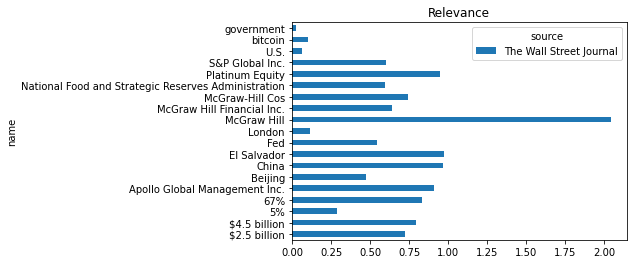

In [ ]:
relevance_df.plot(kind='barh',title= 'Relevance')


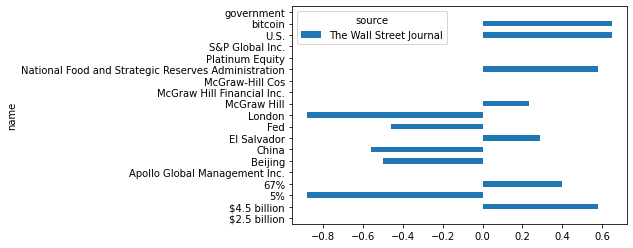

In [ ]:
sentiment_df.plot(kind ='barh')

In [ ]:
relevance_df.dropna()


source,The Wall Street Journal
name,
$2.5 billion,0.722576
$4.5 billion,0.794448
5%,0.290518
67%,0.829326
Apollo Global Management Inc.,0.911516
Beijing,0.476590
China,0.965446
El Salvador,0.970822
Fed,0.546106


In [ ]:
sentiment_df.dropna()

source,The Wall Street Journal
name,
$2.5 billion,0.000000
$4.5 billion,0.578632
5%,-0.879126
67%,0.397632
Apollo Global Management Inc.,0.000000
Beijing,-0.497916
China,-0.557499
El Salvador,0.289200
Fed,-0.460767
